In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

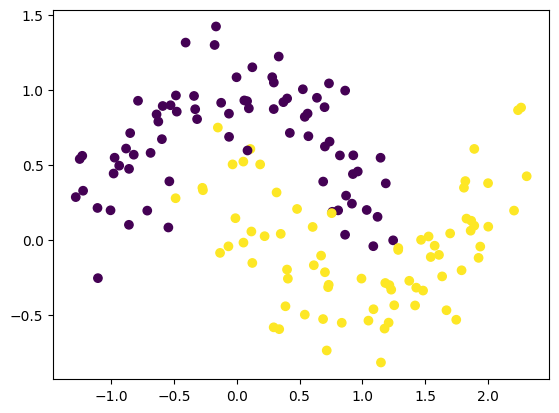

In [4]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(1.0, 0.8)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [91, 92, 93, 94, 95],
    'min_samples_leaf' : [1, 2,3, 4, 5, 6, 7, 8, 9]
}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, error_score='raise')
gsc_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [91, 92, 93, 94, 95],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [13]:
gsc_dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 91, 'min_samples_leaf': 3}

In [14]:
gsc_dt_clf.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=91, min_samples_leaf=3)

In [15]:
gsc_dt_clf.best_estimator_.score(X_train, y_train), gsc_dt_clf.best_estimator_.score(X_test, y_test)

(0.9583333333333334, 0.8333333333333334)

#Iris Data

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [17]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
from pathlib import Path

In [20]:
IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [21]:
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH / "iris_tree.dot"),
    feature_names=["petal length (cm)", "petal_width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
pip install graphviz

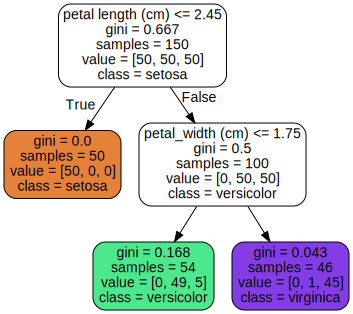

In [24]:
from graphviz import Source
Source.from_file(IMAGES_PATH / "iris_tree.dot")

#Estimating Class Probabilities

In [25]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [26]:
tree_clf.predict([[5, 1.5]])

array([1])

#Regularization Hyperparameteres

In [27]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [28]:
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [29]:
X_moons_test, y_moons_test = make_moons(n_samples=150, noise=0.2, random_state=53)

In [30]:
tree_clf1.score(X_moons_test, y_moons_test), tree_clf2.score(X_moons_test, y_moons_test)

(0.8666666666666667, 0.92)

#Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [32]:
tree_reg.score(X_quad, y_quad)

0.7966018355059642

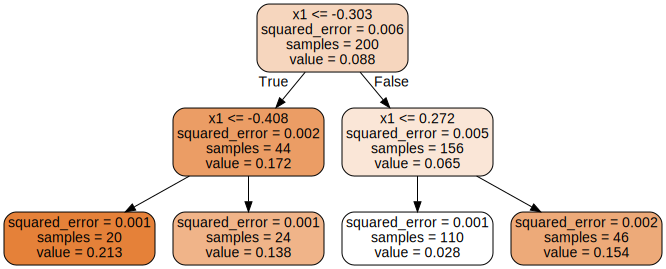

In [33]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

#Train/Validation/Test

In [ ]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

#Mentor Hours

In [ ]:
# Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)

In [ ]:
# Use train_test_split() to split the dataset into a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2)

In [ ]:
# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values
# for a DecisionTreeClassifier.

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(1.0, 0.7915)

In [ ]:
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [91, 92, 93, 94, 95],
    'min_samples_leaf' : [1, 2,3, 4, 5, 6, 7, 8, 9],
    'max_leaf_nodes' : [50, 60, 70, 80, 100]
}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, error_score='raise')
gsc_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [91, 92, 93, 94, 95],
                         'max_leaf_nodes': [50, 60, 70, 80, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gsc_dt_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 91,
 'max_leaf_nodes': 60,
 'min_samples_leaf': 9}

In [ ]:
gsc_dt_clf.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=91, max_leaf_nodes=60,
                       min_samples_leaf=9)

In [ ]:
gsc_dt_clf.best_estimator_.score(X_train, y_train), gsc_dt_clf.best_estimator_.score(X_test, y_test)

(0.86525, 0.8525)

In [ ]:
# Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set.

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_moons, y_moons, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(1.0, 0.806)

In [ ]:
param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [91, 92, 93, 94, 95],
    'min_samples_leaf' : [1, 2,3, 4, 5, 6, 7, 8, 9],
    'max_leaf_nodes' : [50, 60, 70, 80, 100]

}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, error_score='raise')
gsc_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [91, 92, 93, 94, 95],
                         'max_leaf_nodes': [50, 60, 70, 80, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gsc_dt_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 91,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 7}

In [ ]:
gsc_dt_clf.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=91, max_leaf_nodes=50,
                       min_samples_leaf=7)

In [ ]:
gsc_dt_clf.best_estimator_.score(X_train, y_train), gsc_dt_clf.best_estimator_.score(X_test, y_test)

(0.86625, 0.855)